In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
"""  
DataFrame shape (rows, columns): (14912, 24)

Columns and data types:
    Unnamed: 0                                 int64
    P_idx                                      int64
    Artist                                    object
    Title                                     object
    Year                                       int64
    Nationality                               object
    Style                                     object
    DataSrc                                   object
    url                                       object
    Img_width                                  int64
    Img_height                                 int64
    Resized_img_width                          int64
    Resized_img_height                         int64
    AspectRatio                              float64
    H0(3-bit median)                         float64
    I1                                       float64
    I2                                       float64
    Dir1                                      object
    Dir2                                      object
    Rc1                                      float64
    Rc2                                      float64
    Line1_(y1y2x1x2_with_top_left_origin)     object


"""

In [1]:
df = pd.read_csv('data/pnas_art_data.csv')
df

NameError: name 'pd' is not defined

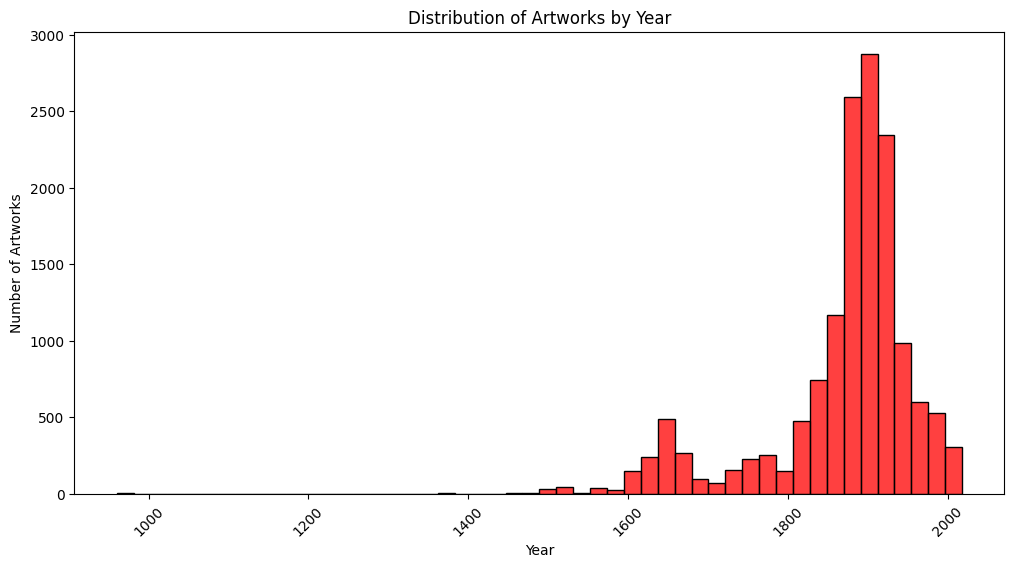

In [3]:
# Artworks by Year
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Year', bins=50, kde=False, color='red', edgecolor='black')
plt.title('Distribution of Artworks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45)
plt.show()

In [4]:
def clean_style(style_str):
    try:
        if '$$' in style_str:
            return style_str.replace('$$',' ')
        else:
            return style_str
    except TypeError:
        print(f'issue: {style_str}')
        return None

In [5]:
df['Style'] = df['Style'].apply(clean_style)

issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan

In [7]:
df['Century'] = ((df['Year']//100 )+1).astype(int)

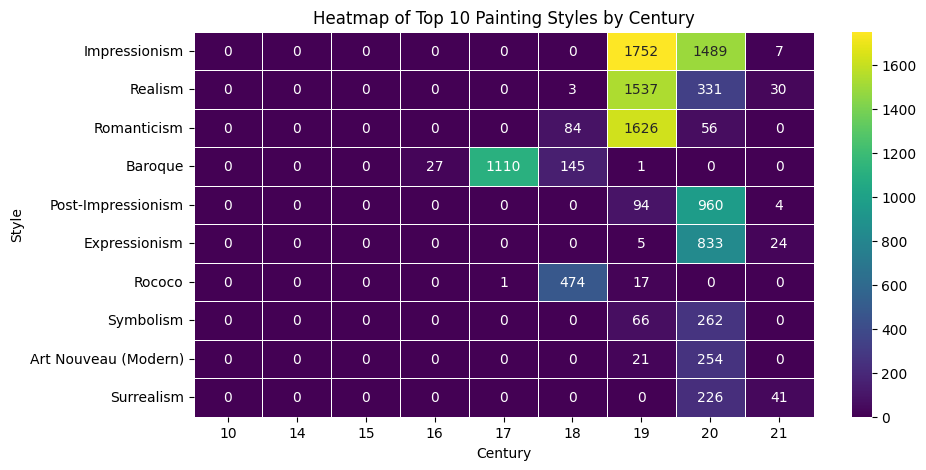

In [8]:
pivot_table = df.pivot_table(index='Style', columns='Century', aggfunc='size', fill_value=0)

style_sums = pivot_table.sum(axis=1)
top_styles = style_sums.sort_values(ascending=False).head(10)
top_pivot_table = pivot_table.loc[top_styles.index]

plt.figure(figsize=(10, 5))  
sns.heatmap(top_pivot_table, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Top 10 Painting Styles by Century')
plt.xlabel('Century')
plt.ylabel('Style')
plt.show()

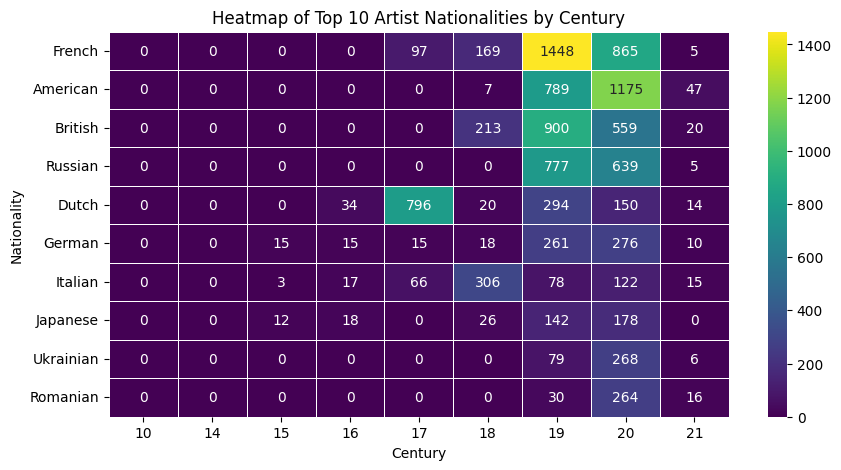

In [9]:
pivot_table = df.pivot_table(index='Nationality', columns='Century', aggfunc='size', fill_value=0)

df['Century'] = ((df['Year']//100 )+1).astype(int)

nationality_sums = pivot_table.sum(axis=1)
top_nationalities = nationality_sums.sort_values(ascending=False).head(10)
top_pivot_table = pivot_table.loc[top_nationalities.index]

plt.figure(figsize=(10, 5))  
sns.heatmap(top_pivot_table, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Top 10 Artist Nationalities by Century')
plt.xlabel('Century')
plt.ylabel('Nationality')
plt.show()

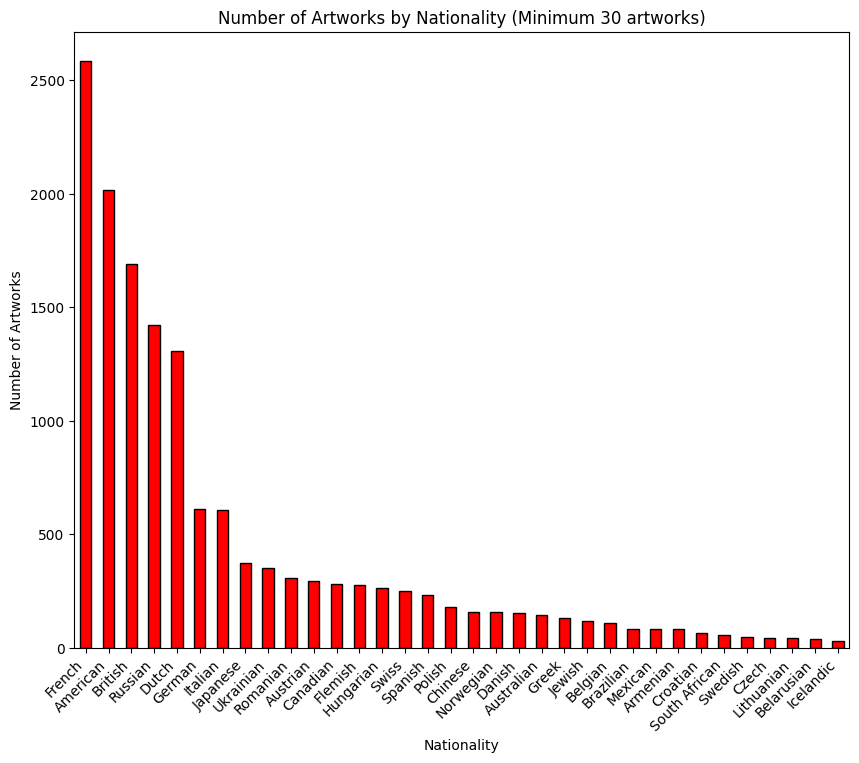

In [10]:
nationality_counts = df['Nationality'].value_counts()
filtered_nationality_counts = nationality_counts[nationality_counts >= 30]
sorted_nationality_counts = filtered_nationality_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sorted_nationality_counts.plot(kind='bar', color='red', edgecolor = 'black')
plt.title('Number of Artworks by Nationality (Minimum 30 artworks)')
plt.xlabel('Nationality')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45, ha='right')  
plt.show()

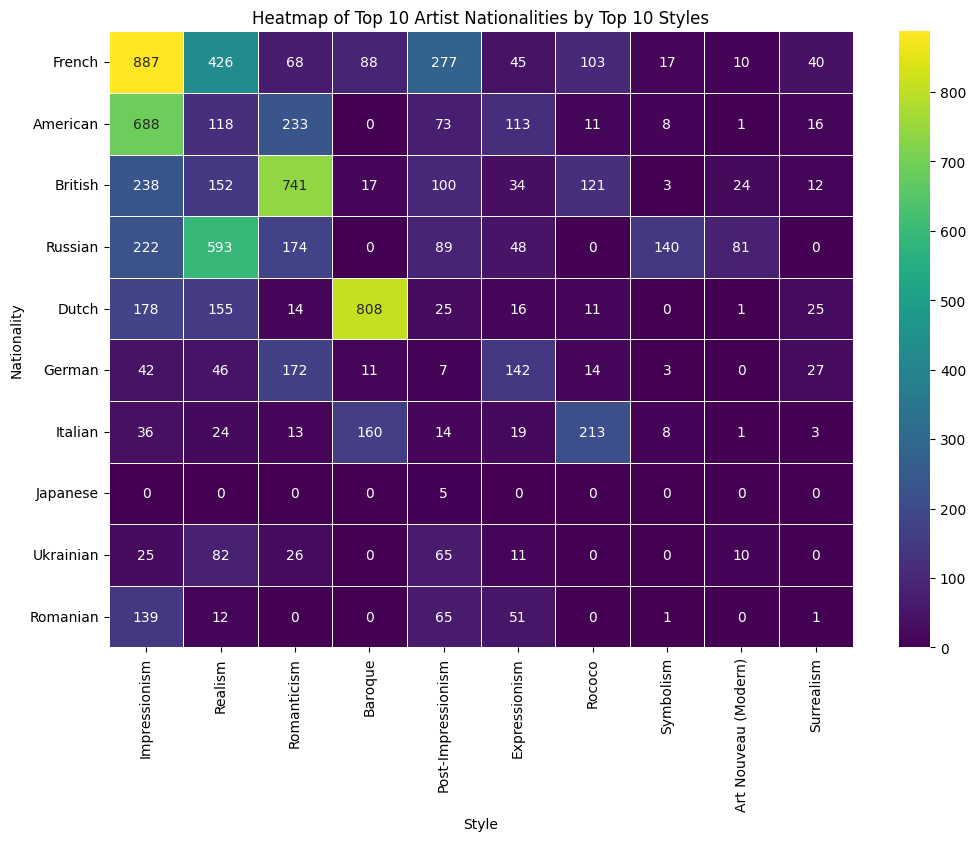

In [13]:
pivot_table = df.pivot_table(index='Nationality', columns='Style', aggfunc='size', fill_value=0)

nationality_sums = pivot_table.sum(axis=1).sort_values(ascending=False).head(10)
style_sums = pivot_table.sum(axis=0).sort_values(ascending=False).head(10)
top_pivot_table = pivot_table.loc[nationality_sums.index, style_sums.index]


plt.figure(figsize=(12, 8))  
sns.heatmap(top_pivot_table, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Top 10 Artist Nationalities by Top 10 Styles')
plt.xlabel('Style')
plt.ylabel('Nationality')
plt.show()